# MLP for Boston Housing Price Regression
This notebook builds a neural network to predict median house values from the Boston Housing dataset. It covers data loading, preprocessing, creating and training multiple MLP architectures, and evaluating their performance.

## 1. Importing Libraries
First, we import the necessary libraries for data manipulation, numerical operations, model building, and evaluation.

In [11]:
# Pandas for data loading and manipulation (e.g., reading CSV).
import pandas as pd
# Random for generating random numbers (used here for the train-test split).
import random
# NumPy for numerical operations and array handling.
import numpy as np
# Keras components for building the neural network.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Scikit-learn utilities for model evaluation and preprocessing pipelines.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 2. Loading and Preparing the Data
We load the Boston Housing dataset, clean it by removing rows with missing values, and then split it into features (X) and the target variable (Y). Finally, we manually split the data into training and testing sets.

In [13]:
# Set a random seed for reproducibility of the train-test split.
np.random.seed(2024)

# Load the dataset from a file into a pandas DataFrame.
dataframe = pd.read_csv("HousingData.xls")

# Drop rows with any missing (NaN) values to clean the data.
dataframe=dataframe.dropna()

# Convert the DataFrame to a NumPy array for use with Keras/Scikit-learn.
dataset = dataframe.values
print(dataset.shape)

# Split the data into input features (X) and the output/target variable (Y).
# X contains the first 13 columns (features).
X = dataset[:,0:13]
# Y contains the 14th column (median house value).
Y = dataset[:,13]

# ---- Manual Train-Test Split ----
num=X.shape[0]   # Total number of samples.
frac=0.15        # Fraction of data to be used for the test set (15%).

# Randomly select indices for the test set without replacement.
test_idx=np.random.choice(range(num), int(num*frac), replace=False)

# Create the training set indices from the remaining samples.
train_idx=[i for i in range(num) if i not in test_idx]

# Create the final training and testing sets based on the selected indices.
train_X=X[train_idx]
train_Y=Y[train_idx]
test_X=X[test_idx]
test_Y=Y[test_idx]

(394, 14)


In [14]:
# Verify the number of samples and the shapes of the split feature sets.
print(num)
print(train_X.shape, test_X.shape)

394
(335, 13) (59, 13)


In [15]:
# Verify the shapes of the split target sets.
print(train_Y.shape, test_Y.shape)

(335,) (59,)


In [16]:
# Double-check that there are no NaN values left in any of the datasets after cleaning and splitting.
print(np.any(np.isnan(train_X)))
print(np.any(np.isnan(train_Y)))
print(np.any(np.isnan(test_X)))
print(np.any(np.isnan(test_Y)))

False
False
False
False


## 3. Baseline Model: Shallow Network
We'll start with a simple, shallow neural network. It has one input layer that matches the number of features (13) and one output layer with a single neuron to predict the house price.

In [17]:
# Define the Keras model using the Sequential API.
model = Sequential()

# Input layer: 13 neurons (one for each feature), with a ReLU activation function.
# `kernel_initializer='normal'` sets the initial weights from a normal distribution.
model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))

# Output layer: 1 neuron for the single continuous output value (house price).
# A linear activation function is used by default, which is appropriate for regression.
model.add(Dense(1, kernel_initializer='normal'))

# Compile the model.
# `loss='mean_squared_error'` is a standard loss function for regression problems.
# `optimizer='adam'` is an efficient and popular optimization algorithm.
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data for 50 epochs.
model.fit(train_X, train_Y, epochs=50, batch_size=10)

Epoch 1/50


d:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 365.9705  
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 146.3977
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 115.0660
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 95.9212
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 81.7682
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 72.9959
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 69.5798
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 67.2898
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 64.9570
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 63.5617
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 60.9563
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 60.0850
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 58.5006
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 56.6032
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/ste

In [18]:
# Evaluate the trained model's performance (mean squared error) on the unseen test data.
loss=model.evaluate(test_X, test_Y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.5229


In [19]:
# Use the model to predict the price for the first sample in the test set.
# The input needs to be reshaped to (1, 13) to represent a single sample.
y=model.predict(test_X[0].reshape(1,13))

# Print the predicted value and the actual value to compare.
print(y, test_Y[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[26.105427]] 23.8


## 4. Deeper Network Architecture
Now, let's see if a deeper network performs better. We add an extra hidden layer with 6 neurons. This increases the model's capacity to learn more complex relationships in the data.

In [20]:
# Define a deeper sequential model.
model = Sequential()
# Input layer (same as before).
model.add(Dense(13, input_shape=(13,), kernel_initializer='normal', activation='relu'))
# New hidden layer with 6 neurons.
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
# Output layer (same as before).
model.add(Dense(1, kernel_initializer='normal'))

# Compile and train the model.
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=50, batch_size=10)

# Evaluate the deeper model on the test data.
loss=model.evaluate(test_X, test_Y)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 560.5049 
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 372.6039
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 136.2320
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 109.8841
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 89.9526
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 76.7813
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 68.9657
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 62.5883
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 59.2228
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 57.9250
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 57.6146
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 55.5188
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 55.2684
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 54.5823
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━

## 5. Wider Network Architecture
Let's try a wider network by increasing the number of neurons in the first hidden layer to 20. This also increases the model's capacity but in a different way than making it deeper.

In [21]:
# Define a wider sequential model.
model = Sequential()
# Wider hidden layer with 20 neurons.
model.add(Dense(20, input_shape=(13,), kernel_initializer='normal', activation='relu'))
# Output layer.
model.add(Dense(1, kernel_initializer='normal'))

# Compile and train the model, saving the history.
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(train_X, train_Y, epochs=50, batch_size=10)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 303.5621
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 150.6651
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 109.9594
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 83.2747
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 74.1323
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 72.9651
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 67.9977
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 67.1450
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 67.5054
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 69.1134
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 65.2914
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 63.5001
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 62.2423
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 62.5528
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [22]:
# Evaluate the wider model.
loss=model.evaluate(test_X, test_Y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.2776


In [23]:
# Evaluate and make a prediction with the final model.
loss_val = model.evaluate(test_X, test_Y)
predictions = model.predict(test_X)

# Calculate the difference between the predicted and actual value for a specific sample.
difference = predictions[12] - test_Y[12]
print(difference)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37.2776
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.08352394]


## 6. Visualizing Training Loss
We can plot the training loss over epochs to visualize how the model's error decreased during training.

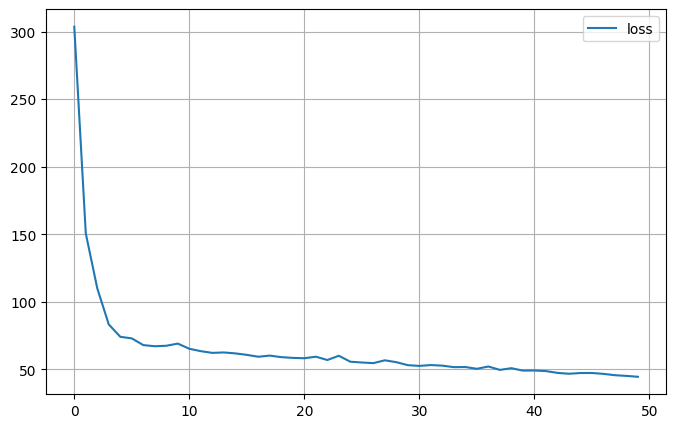

In [24]:
# Import plotting libraries.
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas DataFrame from the training history.
pd.DataFrame(history.history).plot(figsize=(8, 5))
# Add a grid for better readability.
plt.grid(True)
# Display the plot.
plt.show()